In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from collections import Counter
import collections
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# graph computing library
import  networkx as nx
import osmnx as ox

In [50]:
# load the graph with nx.read_graphml
G = nx.read_graphml('dataset/manhatten.graphml')

In [68]:
G = ox.graph_from_place('Manhattan, New York')

In [69]:
print(nx.info(G))

Name: Manhattan, New York
Type: MultiDiGraph
Number of nodes: 14489
Number of edges: 37963
Average in degree:   2.6201
Average out degree:   2.6201


In [70]:
G_simple = nx.Graph(G)
print(nx.info(G_simple))

Name: Manhattan, New York
Type: Graph
Number of nodes: 14489
Number of edges: 23591
Average degree:   3.2564


In [71]:
degree_dic = Counter(dict(G_simple.degree()).values())

In [72]:
degree_hist = pd.DataFrame({'degree': list(degree_dic.values()),
                           "Number of Nodes": list(degree_dic.keys())})

In [73]:
degree_hist

,degree,Number of Nodes
0,6091,4
1,6643,3
2,155,5
3,356,2
4,1213,1
5,28,6
6,3,7


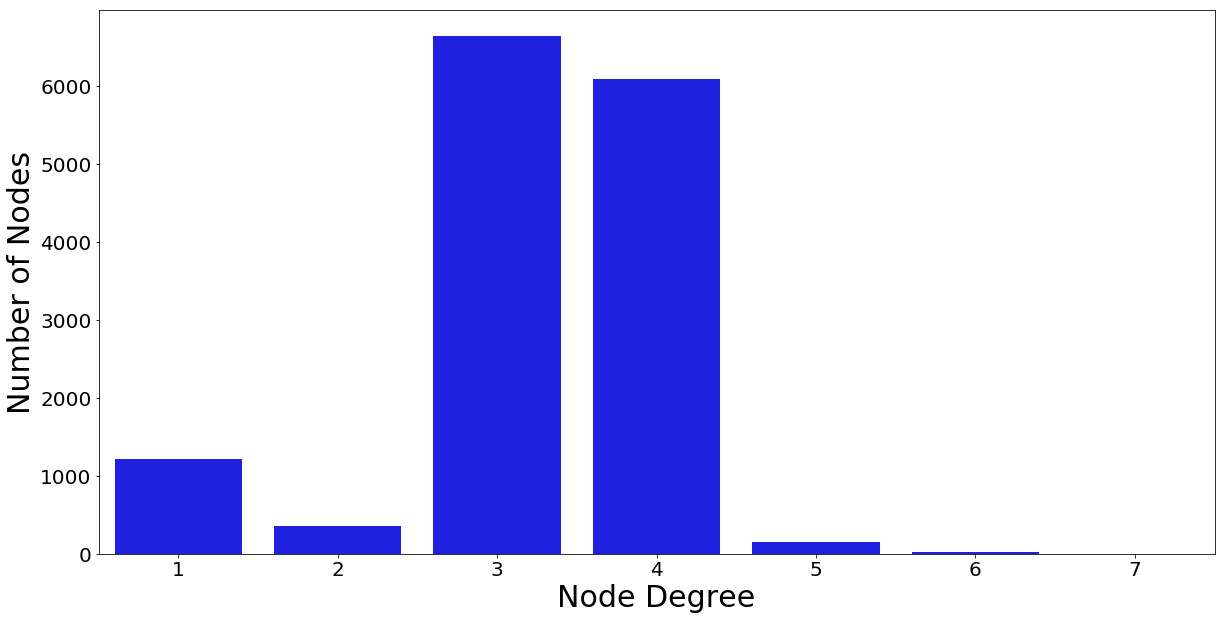

In [74]:
plt.figure(figsize=(20, 10))
sns.barplot(y='degree', x='Number of Nodes',
           data=degree_hist, color='blue')
plt.xlabel('Node Degree', fontsize=30)
plt.ylabel("Number of Nodes", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

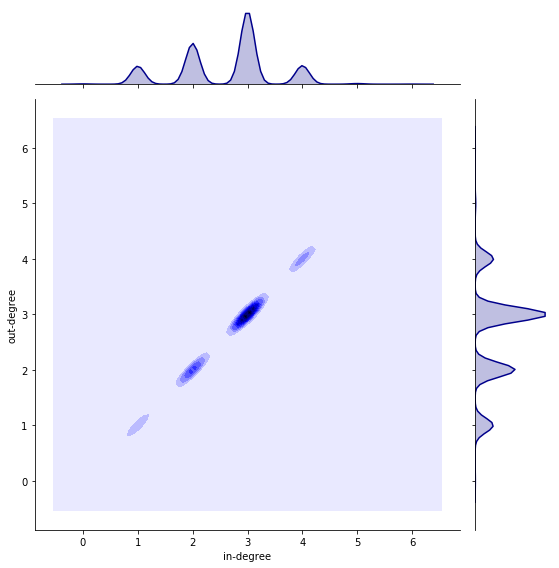

In [75]:
ins = list(dict(G.in_degree()).values())
outs = list(dict(G.out_degree()).values())
degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree", y="out-degree", data=degrees,
                   kind='kde', color='darkblue', size=8)

#### Graph Density
Graph density defines how many links from all possible links within the network are realized.

$ dens_{undirected} = \frac{2E}{N(N-1)} $

$ dens_{directed} = \frac{E}{N(N-1)} $

In [76]:
nx.density(G)

0.0001808479854040341

In [77]:
G

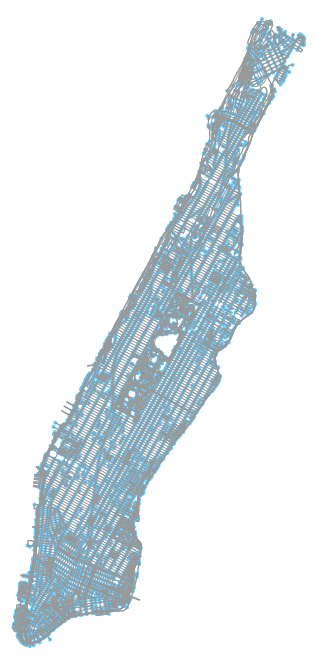

(<Figure size 530.373x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2071c441eb8>)

In [67]:
ox.plot_graph(G,
              fig_height=12, node_size=10, node_color='808080')

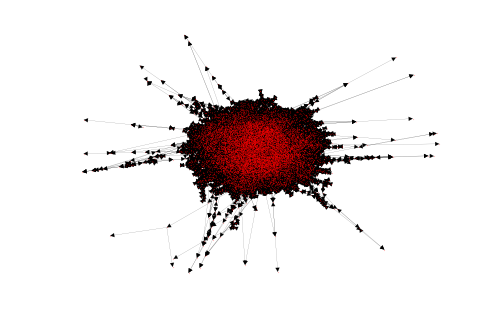

In [78]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.01, width=0.1)

In [79]:
print(G[list(G.nodes())[0]])

{4872498725: {0: {'osmid': 22936299, 'name': 'West 30th Street', 'highway': 'footway', 'oneway': False, 'length': 10.705}}, 247073541: {0: {'osmid': 22936299, 'name': 'West 30th Street', 'highway': 'footway', 'oneway': False, 'length': 22.599}}, 42437699: {0: {'osmid': 118714476, 'oneway': True, 'lanes': '4', 'ref': 'NY 9A', 'name': '12th Avenue', 'highway': 'trunk', 'maxspeed': '35 mph', 'length': 13.869}}}


On the bases of the shortest path we can define many more measurements, e.g., the longest shortest path in the network is called the **diameter** of the graph

In [80]:
nx.diameter(G_simple)

93

In [81]:
nx.average_shortest_path_length(G_simple)

38.887600616610506

**Scale-Free Property** states that 'real' networks do have a certain underlying creation process, like the WWW there some nodes do get more attention than others and therefore manage to build much more edges than other nodes., resulting in some nodes which have a much higher degree compared to other nodes.

These nodes with a very high degree in the network are called **hubs**.

In [82]:
in_degrees = G.in_degree()
in_h = Counter(dict(in_degrees).values())
in_dic = collections.OrderedDict(sorted(in_h.items()))
in_hist = list(in_dic.values())
in_values = list(in_dic.keys())

In [83]:
out_degrees = G.out_degree()
out_h = Counter(dict(out_degrees).values())
out_dic = collections.OrderedDict(sorted(out_h.items()))
out_hist = list(out_dic.values())
out_values = list(out_dic.keys())

In [84]:
mu = 2.17
sigma = np.sqrt(mu)
mu_plus_sigma = mu + sigma
x = range(0, 10)
prob = stats.poisson.pmf(x, mu)*4426

(1.0, 200)

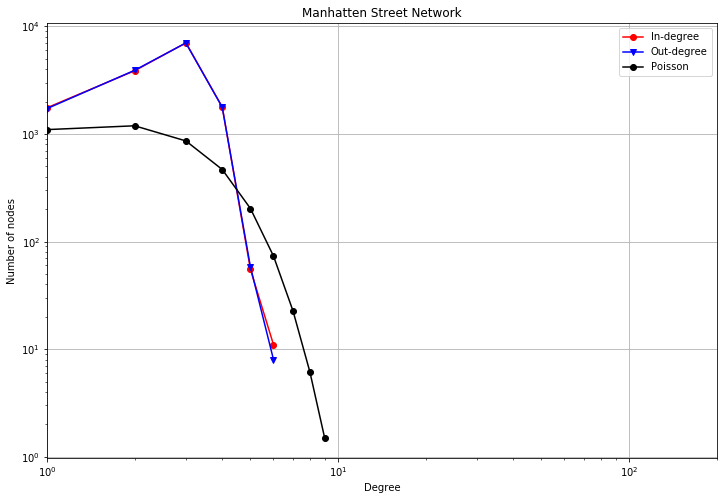

In [85]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.loglog(out_values, out_hist, 'ro-') #in-degree
plt.loglog(in_values, in_hist, 'bv-') # in-degree
plt.plot(x, prob, "o-", color='black')
plt.legend(['In-degree', 'Out-degree', 'Poisson'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Manhatten Street Network')
plt.xlim([0, 2*10**2])

The **Node Connectivity** describes the number of nodes we must delete from the Graph G until it is **disconnected**. 

If every node in our graph G can reach any other node in the network via edges it is **connected**, else it's **disconnected**.

In [87]:
# create two simple graphs from our original directed graph
G_simple = nx.Graph(G)
G_simple2 = nx.Graph(G)

### Algebraid Connectivity

Graphs can be differently defined as matrices and one of these matrices is the so called Laplacian matrix, which has special properties in the eigenspace. Its eigenvalues are non negative and if ordered the smallest one eigenvalue is zero. The second smallest eigenvalue of the Laplacian matrix is called the algebraic connectivity or the Fiedler value. It is directly indicater for the robustness of the network have the properties that:

- The Algebraic Connectivity is equal to zero if and only if the graph is connected.
- The Algebraic Connectivity of an graph is not greater than the node connectivity.

In [90]:
nx.algebraic_connectivity(G_simple)

0.00017739906298969645